Importing Libraries:


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/loan prediction/train_loan.csv")

Data Exploration and checking missing values:


In [49]:
df.shape

(614, 13)

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [52]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [53]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
df['Self_Employed'].fillna('No',inplace=True)  

In [55]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
df['Dependents'].fillna('0', inplace= True)

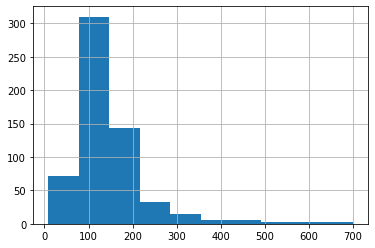

In [57]:
df['LoanAmount'].hist(bins=10)

In [0]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [59]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for credit History:')
print(temp1)

print('\n Probability of getting loan for each credit history class:')
print(temp2)

Frequency Table for credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of getting loan for each credit history class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [60]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [0]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [62]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
features=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
LE=LabelEncoder()
for i in features:
    df[i]=LE.fit_transform(df[i])
df.dtypes
    

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [22]:
X1=df.iloc[:,1:12]
X1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [25]:
Y1=df.iloc[:,12]
Y1

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [37]:
df.drop("Loan_ID",axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [40]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
df2 = Sc.fit_transform(df)
df2=pd.DataFrame(np.array(df2))
df2

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-1.318513,-1.482537
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.273231,0.411733,1.223298,0.674519
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.273231,0.411733,-1.318513,0.674519
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.522836,0.411733,-1.318513,0.674519
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.273231,0.411733,1.223298,0.674519


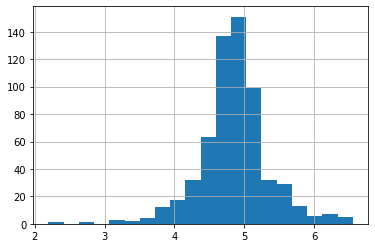

In [64]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [67]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


In [0]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf= KFold(n_splits=5)
  error = []
  for train, test in kf.split(df):
    # Filter training data
    train_predictors = data[predictors].iloc[train,:]
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

Predictive model:

In [70]:
outcome_var='Loan_Status'
model=DecisionTreeClassifier()
predictor_var=['Credit_History', 'Loan_Amount_Term','LoanAmount_log','TotalIncome_log','Education']
classification_model(model,df,predictor_var, outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 70.363%


In [72]:
model=RandomForestClassifier(n_estimators=100)
predictor_var=['Dependents', 'Education','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log','TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.013%


In [73]:
featimp=pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

TotalIncome_log     0.313827
Credit_History      0.273742
LoanAmount_log      0.242798
Dependents          0.057734
Loan_Amount_Term    0.046723
Property_Area       0.045316
Education           0.019861
dtype: float64


In [74]:
model=RandomForestClassifier(n_estimators=25, min_samples_split=20,max_depth=10, max_features=1)
predictor_var=['TotalIncome_log', 'Credit_History','LoanAmount_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 83.388%
Cross-Validation Score : 78.990%
